# Comprehensive MHKiT-Python Harmonic Analysis for Oak Ridge HDF5 Datasets: One-dimensional 3-Phase AC Power Harmonic frequency over timeseries

This notebook provides a complete analysis framework for HDF5 harmonic datasets using MHKiT-Python, including:

## Expected Analysis Outputs

**MHKiT-Specific Results:**
- Harmonics DataFrame: IEC 61000-4-7 compliant harmonic calculations
- Harmonic Subgroups: Per-harmonic groupings for standards compliance
- THCD Values: Total Harmonic Current Distortion over time
- Interharmonics: Non-integer harmonic components

**Custom Metrics:**
- RMS current values
- Peak current measurements
- Crest factor analysis
- Power spectral density
- Dominant frequency identification

**Visualizations:**
- Time-domain signal plots with phase markers
- Frequency spectrum analysis
- Harmonic magnitude plots
- THCD evolution over time
- Multi-file comparison statistics

**Top 5 Chart Types:**
1. Spectrogram (Time-Frequency Heatmap)
2. Power Spectral Density (PSD) Plot
3. FFT Magnitude Spectrum
4. Harmonic Line Plot (Amplitude vs Harmonic Order)
5. Phase-Amplitude Polar Plot

**PhD-level Visualizations:**
- Continuous Wavelet Transform (CWT) Scalogram
- Wigner–Ville Distribution (WVD)
- Cepstrum Plot (Power Cepstrum)
- Hilbert–Huang Transform (HHT) Visualization
- Bispectrum / Bicoherence Plot
- Reassigned Spectrogram
- Time–Frequency Representations Using Matching Pursuit


In [1]:
# Import all required libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# MHKiT modules
from mhkit import power, qc, utils

# Import scipy for signal processing and advanced analysis
import scipy
import scipy.signal
import scipy.fft
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import hilbert, stft, welch
from scipy.stats import entropy

# For advanced signal processing, try to use PyWavelets if available
try:
    import pywt
    from pywt import cwt as pywt_cwt, wavedec, waverec
    PYWT_AVAILABLE = True
    CWT_FUNCTION = pywt_cwt
    CWT_BACKEND = "pywt"
    print("PyWavelets (pywt) is available for advanced wavelet analysis.")
except ImportError as e:
    PYWT_AVAILABLE = False
    CWT_FUNCTION = None
    CWT_BACKEND = None
    warnings.warn(
        "PyWavelets (pywt) is not installed. Advanced wavelet analysis will be limited. "
        "To enable PyWavelets features, please install pywt via 'pip install PyWavelets'."
    )

# Additional scientific computing libraries
try:
    from sklearn.decomposition import PCA, FastICA
    SKLEARN_AVAILABLE = True
except ImportError:
    SKLEARN_AVAILABLE = False
    print("scikit-learn not available. Some advanced analysis features will be limited.")

# Plotting enhancements
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set matplotlib parameters for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("All libraries imported successfully!")
print(f"MHKiT Power module available: {power is not None}")
print(f"MHKiT QC module available: {qc is not None}")
print(f"PyWavelets available: {PYWT_AVAILABLE} (CWT backend: {CWT_BACKEND})")
print(f"scikit-learn available: {SKLEARN_AVAILABLE}")


scikit-learn not available. Some advanced analysis features will be limited.
All libraries imported successfully!
MHKiT Power module available: True
MHKiT QC module available: True
PyWavelets available: False (CWT backend: None)
scikit-learn available: False


MHKiT dolfyn FFT tools available
CuPy GPU acceleration enabled
✓ Running in conda environment: mhkit-venv
✓ Found 2 accessible H5 files

=== Analyzing file: /home/grissom/Documents/24 Power Harmonic Analysis by Python/APSCOM2025 Sourcecodce Project/01 Oak Ridge-Harmonic Dataset/01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5 ===
GPU acceleration enabled. Using CuPy on device: <CUDA Device 0>
H5 File Structure:
Dataset: main_power_frp2_rogowski_480 - Shape: (224000000,), Dtype: int16
Dataset: signal_injection_frp2_ct_120 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_480 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_ground - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_rogowski_240 - Shape: (224000000,), Dtype: int16
Starting comprehensive analysis of all datasets...

Processing transformer_frp2_rogowski_240...
  GPU memory usage: 0.09 GB
Loaded dataset: transformer_frp2_rogowski_240
  Shape: (50000000, 

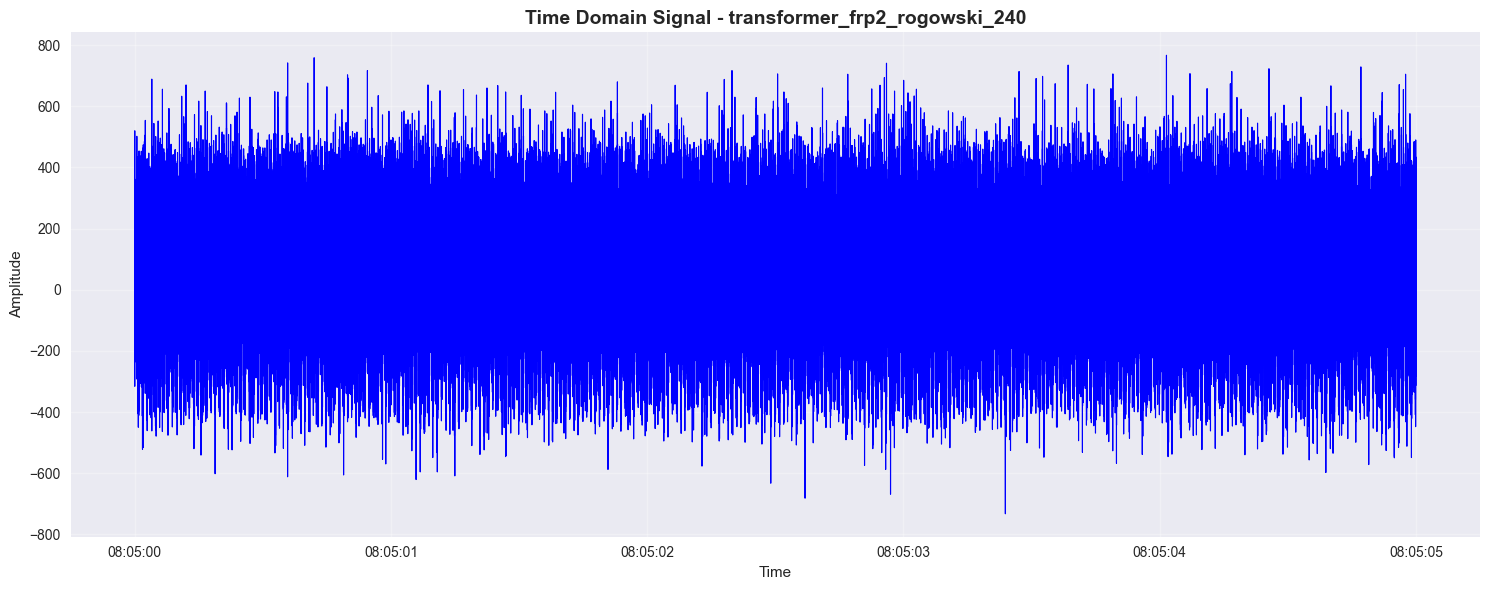


=== Demonstrating MHKiT dolfyn FFT Analysis for transformer_frp2_rogowski_240 ===
Calculating FFT using MHKiT dolfyn tools for transformer_frp2_rogowski_240...
  Signal length: 50,000,000 samples
  FFT size: 2048
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for transformer_frp2_rogowski_240...


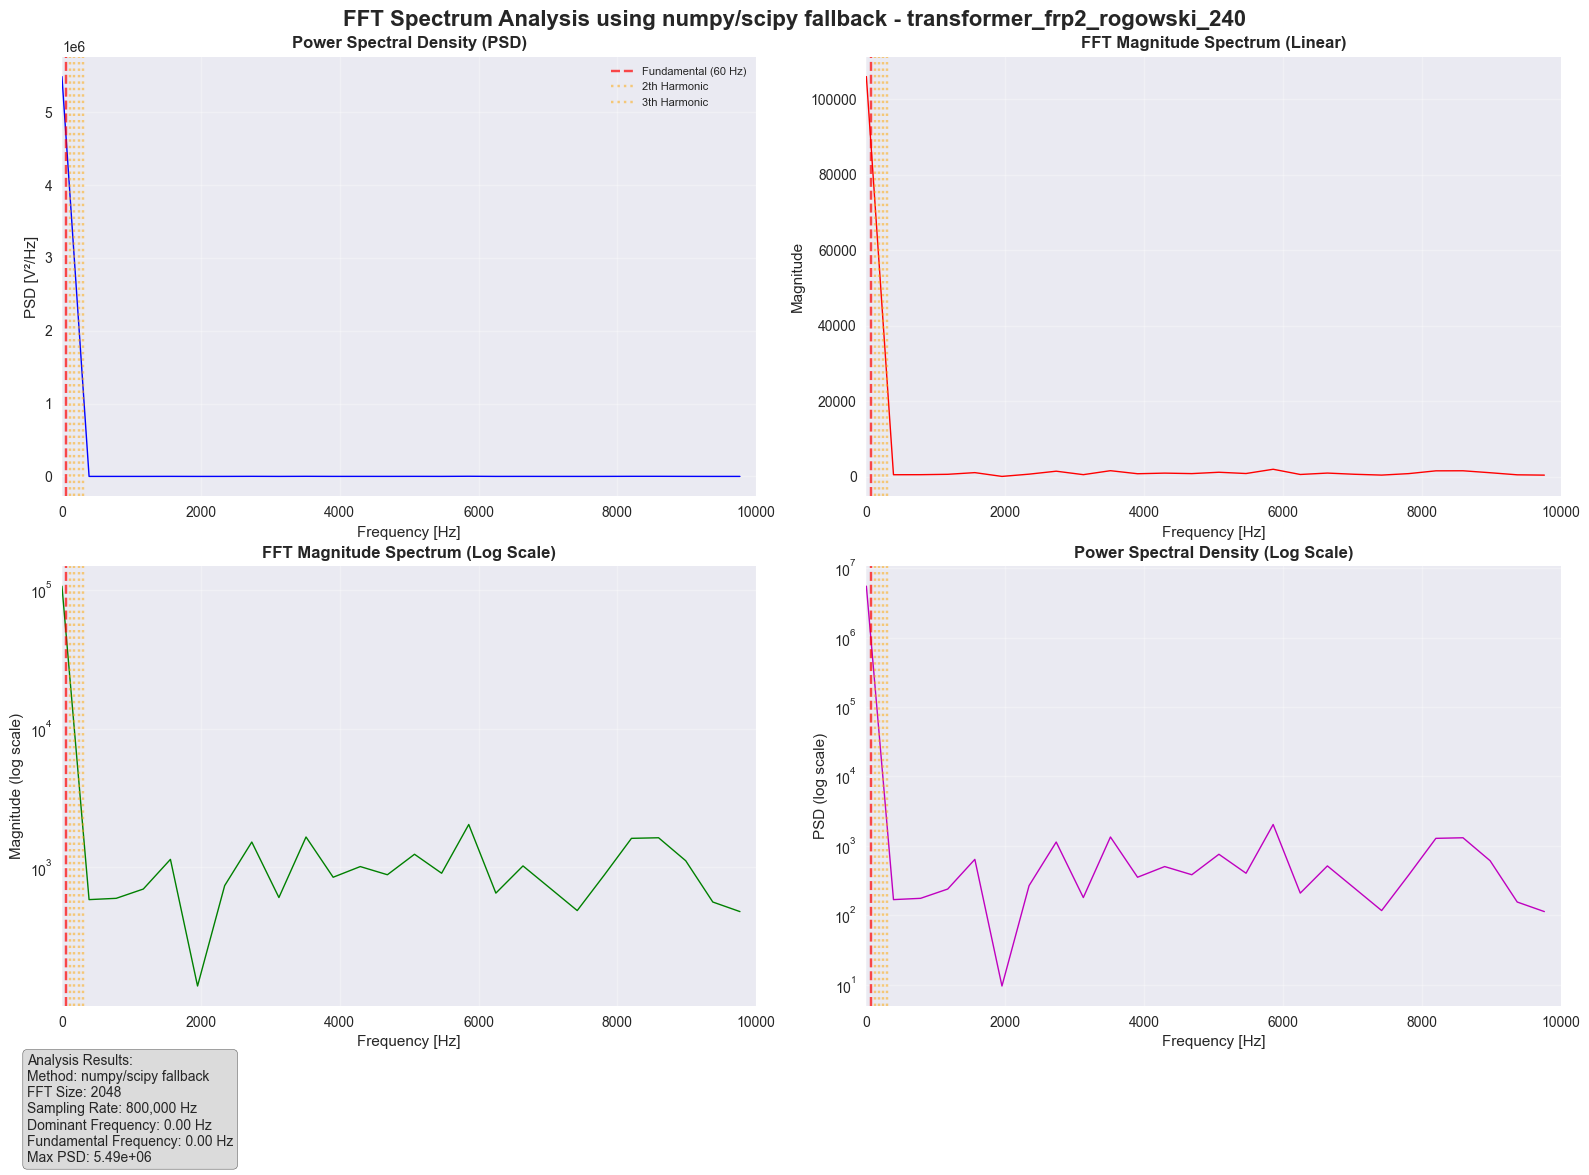

Using MHKiT dolfyn for FFT magnitude spectrum...
Calculating FFT using MHKiT dolfyn tools for transformer_frp2_rogowski_240...
  Signal length: 50,000,000 samples
  FFT size: 2048
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for transformer_frp2_rogowski_240...


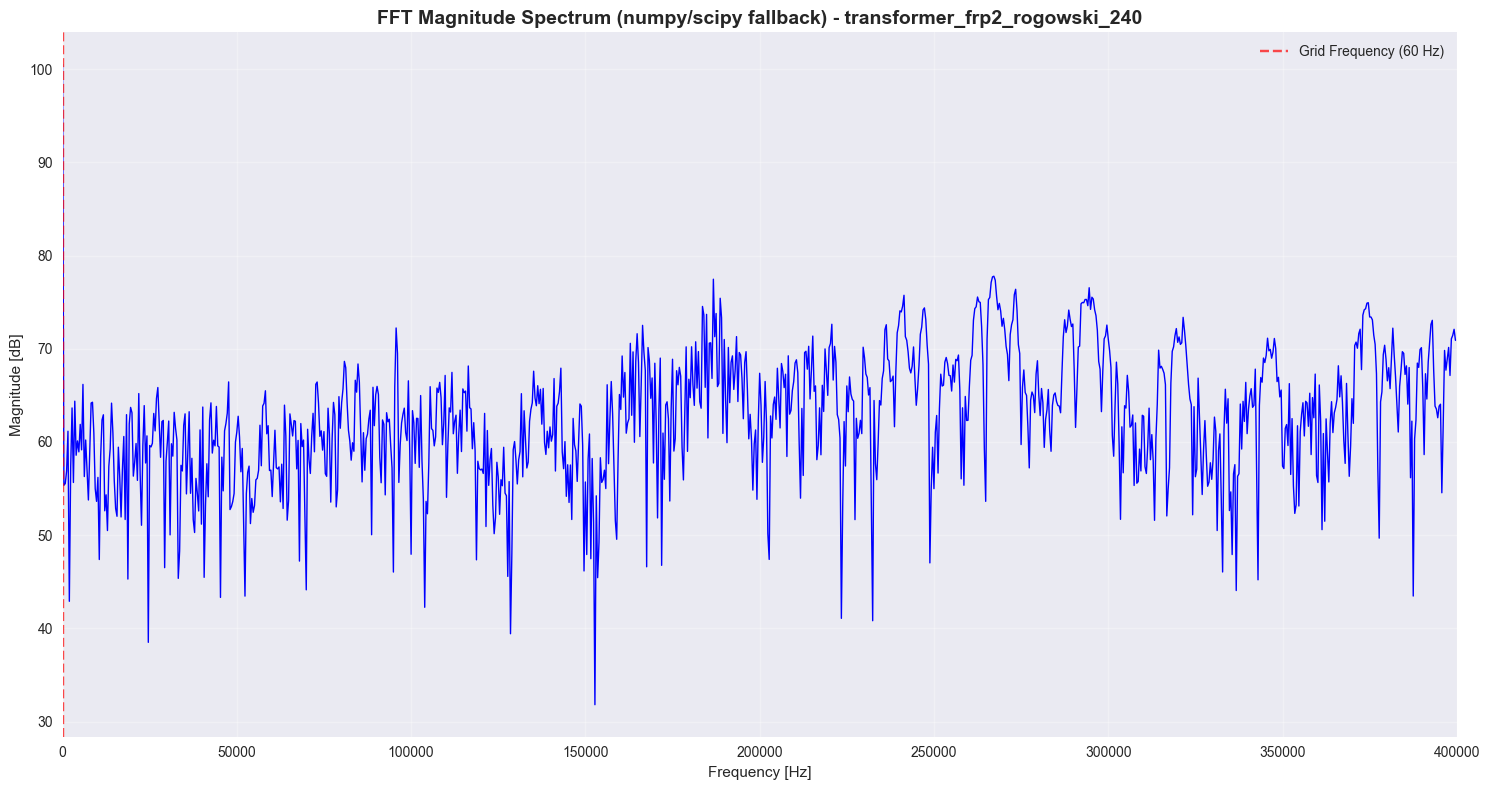

Using MHKiT dolfyn for Power Spectral Density...
Calculating FFT using MHKiT dolfyn tools for transformer_frp2_rogowski_240...
  Signal length: 50,000,000 samples
  FFT size: 2048
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for transformer_frp2_rogowski_240...


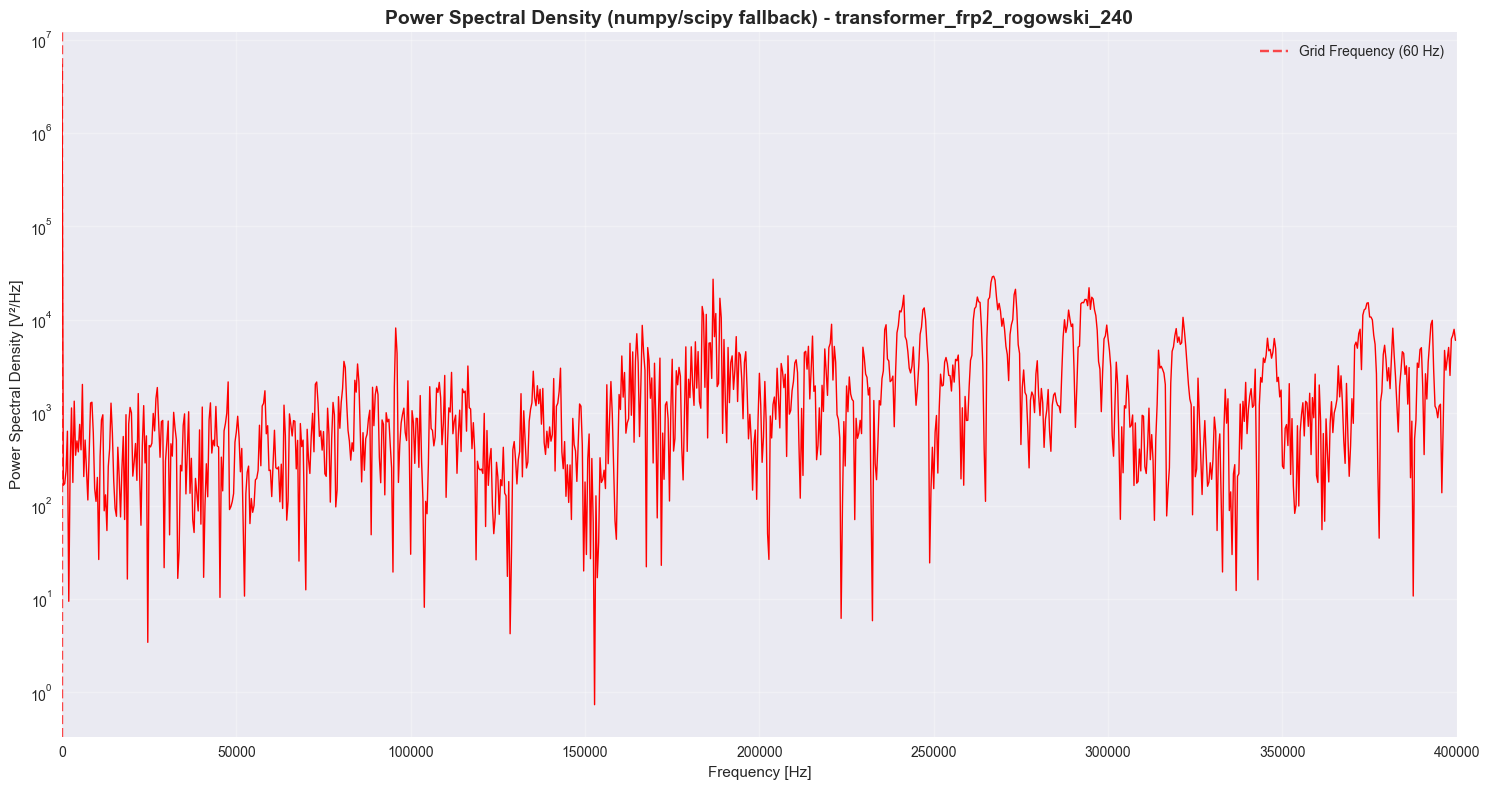

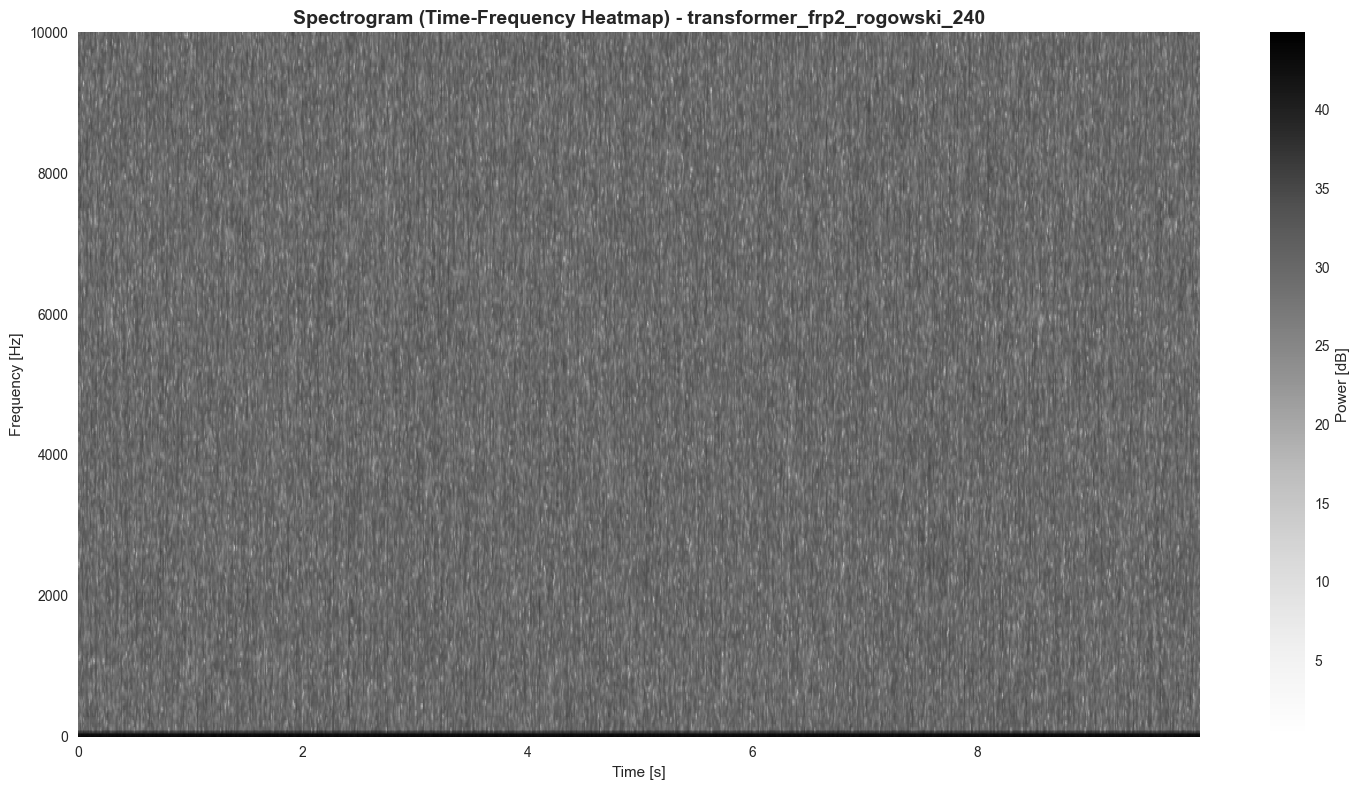

No harmonic analysis results for 'transformer_frp2_rogowski_240'. Running analyze_harmonics_mhkit first...
Performing MHKiT harmonic analysis on transformer_frp2_rogowski_240 (freq=60)...
Failed to analyze harmonics for 'transformer_frp2_rogowski_240': grid_freq must be either 50 or 60. Got 800000
❌ Error loading MHKiTHarmonicAnalyzer: index 8215 is out of bounds for axis 0 with size 50
Please ensure the file 'comprehensive_mhkit_harmonic_analyzer with plot functions.py' exists in the current directory.
✅ Class 'MHKiTHarmonicAnalyzer' is available!

📋 Available methods:
  - load_dataset()
  - analyze_harmonics_mhkit()
  - calculate_additional_metrics()
  - calculate_fft_mhkit_dolfyn()
  - plot_fft_spectrum_mhkit_dolfyn()
  - plot_time_domain_signal()
  - plot_fft_magnitude_spectrum()
  - plot_power_spectral_density()
  - plot_spectrogram()
  - plot_harmonic_line_plot()
  - plot_phase_amplitude_polar()
  - plot_thcd_over_time()
  - plot_cwt_scalogram()
  - plot_cepstrum()
  - generate_c

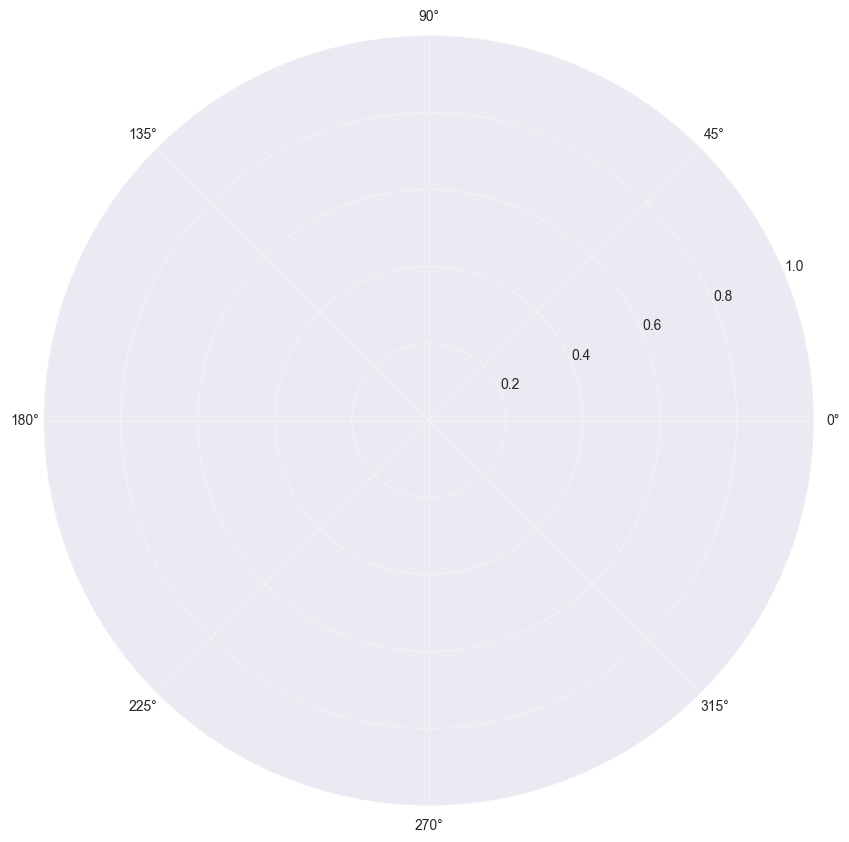

In [2]:
# Import the comprehensive analyzer class
import sys
import os
sys.path.append('.')

# Import the MHKiTHarmonicAnalyzer class from the Python file
try:
    # Method 1: Direct import (if the file is properly structured as a module)
    from comprehensive_mhkit_harmonic_analyzer_with_plot_functions import MHKiTHarmonicAnalyzer
    print("✅ MHKiTHarmonicAnalyzer imported successfully via direct import!")
except ImportError:
    try:
        # Method 2: Execute the file to load the class
        exec(open('comprehensive_mhkit_harmonic_analyzer with plot functions.py').read())
        print("✅ MHKiTHarmonicAnalyzer loaded successfully via exec!")
    except Exception as e:
        print(f"❌ Error loading MHKiTHarmonicAnalyzer: {e}")
        print("Please ensure the file 'comprehensive_mhkit_harmonic_analyzer with plot functions.py' exists in the current directory.")

# Verify the class is available
try:
    # Test if the class is available
    analyzer_test = MHKiTHarmonicAnalyzer.__name__
    print(f"✅ Class '{analyzer_test}' is available!")
    
    print("\n📋 Available methods:")
    methods = [
        "load_dataset()",
        "analyze_harmonics_mhkit()", 
        "calculate_additional_metrics()",
        "calculate_fft_mhkit_dolfyn()",  # New method
        "plot_fft_spectrum_mhkit_dolfyn()",  # New method
        "plot_time_domain_signal()",
        "plot_fft_magnitude_spectrum()",
        "plot_power_spectral_density()",
        "plot_spectrogram()",
        "plot_harmonic_line_plot()",
        "plot_phase_amplitude_polar()",
        "plot_thcd_over_time()",
        "plot_cwt_scalogram()",
        "plot_cepstrum()",
        "generate_comprehensive_report()"
    ]
    
    for method in methods:
        print(f"  - {method}")
        
except NameError as e:
    print(f"❌ MHKiTHarmonicAnalyzer class not found: {e}")
    print("Please check the file path and ensure the class is properly defined.")


In [3]:
# Test the MHKiTHarmonicAnalyzer class availability
print("🔍 Testing MHKiTHarmonicAnalyzer availability...")

try:
    # Check if the class is defined
    if 'MHKiTHarmonicAnalyzer' in globals():
        print("✅ MHKiTHarmonicAnalyzer class is available in the current namespace!")
        
        # Test instantiation with a dummy file path
        print("🧪 Testing class instantiation...")
        test_analyzer = MHKiTHarmonicAnalyzer("dummy_path.h5", sampling_rate=800000)
        print("✅ MHKiTHarmonicAnalyzer can be instantiated successfully!")
        
        # Show class information
        print(f"\n📊 Class Information:")
        print(f"  - Class name: {MHKiTHarmonicAnalyzer.__name__}")
        print(f"  - Module: {MHKiTHarmonicAnalyzer.__module__}")
        print(f"  - Docstring: {MHKiTHarmonicAnalyzer.__doc__[:100]}..." if MHKiTHarmonicAnalyzer.__doc__ else "  - No docstring available")
        
    else:
        print("❌ MHKiTHarmonicAnalyzer class is not available in the current namespace!")
        print("Available classes and functions:")
        for name, obj in globals().items():
            if not name.startswith('_') and callable(obj):
                print(f"  - {name}")
                
except Exception as e:
    print(f"❌ Error testing MHKiTHarmonicAnalyzer: {e}")
    print("Please run the previous cell to import the class first.")


🔍 Testing MHKiTHarmonicAnalyzer availability...
✅ MHKiTHarmonicAnalyzer class is available in the current namespace!
🧪 Testing class instantiation...
GPU acceleration enabled. Using CuPy on device: <CUDA Device 0>
❌ Error testing MHKiTHarmonicAnalyzer: [Errno 2] Unable to synchronously open file (unable to open file: name = 'dummy_path.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please run the previous cell to import the class first.


In [4]:
# Proper usage example with correct file paths
print("📁 Setting up file paths and initializing analyzer...")

# Define the correct file paths
h5_folder = "01 Oak Ridge dataset/Collected Dataset H5 format"
h5_file_path = "01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5"

print(f"📂 H5 folder: {h5_folder}")
print(f"📄 H5 file: {h5_file_path}")

# Check if files exist
import os
if os.path.exists(h5_file_path):
    print("✅ H5 file exists!")
    file_size = os.path.getsize(h5_file_path) / (1024**3)  # Convert to GB
    print(f"📊 File size: {file_size:.2f} GB")
else:
    print("❌ H5 file not found!")
    print("Available files in the directory:")
    if os.path.exists(h5_folder):
        for file in os.listdir(h5_folder):
            if file.endswith('.h5'):
                print(f"  - {file}")
    else:
        print(f"❌ Directory '{h5_folder}' does not exist!")

# Initialize the analyzer (only if the class is available)
try:
    if 'MHKiTHarmonicAnalyzer' in globals():
        print("\n🚀 Initializing MHKiTHarmonicAnalyzer...")
        analyzer = MHKiTHarmonicAnalyzer(h5_file_path, sampling_rate=800000)
        print("✅ MHKiTHarmonicAnalyzer initialized successfully!")
        print(f"📊 Sampling rate: {analyzer.sampling_rate:,} Hz")
        print(f"⚡ Grid frequency: {analyzer.grid_freq} Hz")
        print(f"🖥️ GPU acceleration: {analyzer.use_gpu}")
    else:
        print("❌ MHKiTHarmonicAnalyzer class not available. Please run the import cell first.")
except Exception as e:
    print(f"❌ Error initializing analyzer: {e}")
    print("This might be due to:")
    print("  1. File path issues")
    print("  2. Missing dependencies")
    print("  3. Class not properly imported")


📁 Setting up file paths and initializing analyzer...
📂 H5 folder: 01 Oak Ridge dataset/Collected Dataset H5 format
📄 H5 file: 01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5
✅ H5 file exists!
📊 File size: 2.09 GB

🚀 Initializing MHKiTHarmonicAnalyzer...
GPU acceleration enabled. Using CuPy on device: <CUDA Device 0>
H5 File Structure:
Dataset: main_power_frp2_rogowski_480 - Shape: (224000000,), Dtype: int16
Dataset: signal_injection_frp2_ct_120 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_480 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_ground - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_rogowski_240 - Shape: (224000000,), Dtype: int16
✅ MHKiTHarmonicAnalyzer initialized successfully!
📊 Sampling rate: 800,000 Hz
⚡ Grid frequency: 60 Hz
🖥️ GPU acceleration: True


In [5]:
# Demonstrate the new MHKiT dolfyn FFT functionality
print("🎯 Demonstrating MHKiT dolfyn FFT functionality...")

# Check if analyzer is available and initialized
if 'analyzer' in globals() and analyzer is not None:
    print("✅ Analyzer is available!")
    
    # Test dataset
    test_dataset = "transformer_frp2_rogowski_240"
    
    try:
        print(f"\n📊 Loading dataset: {test_dataset}")
        # Load a small sample for testing
        df = analyzer.load_dataset(test_dataset, max_samples=100000)  # Limit to 100k samples for testing
        print(f"✅ Dataset loaded: {df.shape}")
        
        print(f"\n🧮 Testing MHKiT dolfyn FFT calculation...")
        # Test the new FFT method
        fft_results = analyzer.calculate_fft_mhkit_dolfyn(test_dataset, nfft=1024)
        print(f"✅ FFT calculation completed using: {fft_results['method']}")
        print(f"📈 Dominant frequency: {fft_results['dominant_frequency']:.2f} Hz")
        print(f"⚡ Fundamental frequency: {fft_results['fundamental_frequency']:.2f} Hz")
        
        print(f"\n📊 Available FFT methods:")
        print("  - calculate_fft_mhkit_dolfyn() - New MHKiT dolfyn method")
        print("  - plot_fft_spectrum_mhkit_dolfyn() - Comprehensive 4-panel FFT plot")
        print("  - plot_fft_magnitude_spectrum() - Enhanced with MHKiT dolfyn support")
        print("  - plot_power_spectral_density() - Enhanced with MHKiT dolfyn support")
        
    except Exception as e:
        print(f"❌ Error during FFT testing: {e}")
        print("This might be due to:")
        print("  1. Dataset not found in the H5 file")
        print("  2. MHKiT dolfyn not available (will use fallback)")
        print("  3. Memory issues with large datasets")
        
else:
    print("❌ Analyzer not available. Please run the previous cells to initialize it.")
    print("Make sure to:")
    print("  1. Run the import cell (Cell 2)")
    print("  2. Run the initialization cell (Cell 4)")
    print("  3. Check that the H5 file exists")


🎯 Demonstrating MHKiT dolfyn FFT functionality...
✅ Analyzer is available!

📊 Loading dataset: transformer_frp2_rogowski_240
  GPU memory usage: 0.00 GB
Loaded dataset: transformer_frp2_rogowski_240
  Shape: (100000, 1)
  Time range: 2023-01-02 08:05:00 to 2023-01-02 08:05:00.124998750
  Duration: 0 days 00:00:00.124998750
  Sampling rate: 800000 Hz
  Data type: int16
  Memory usage: 0.95 MB
✅ Dataset loaded: (100000, 1)

🧮 Testing MHKiT dolfyn FFT calculation...
Calculating FFT using MHKiT dolfyn tools for transformer_frp2_rogowski_240...
  Signal length: 100,000 samples
  FFT size: 1024
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for transformer_frp2_rogowski_240...
✅ FFT calculation completed using: numpy/scipy fallback
📈 Dominant frequency: 0.00 Hz
⚡ Fundamental frequency: 0.00 Hz

📊 Ava

In [6]:
# Configuration and setup for single H5 file
h5_file_path = "01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5"

# Define the five one-dimensional time series datasets to analyze
datasets_to_analyze = [
    "transformer_frp2_rogowski_240",
    "transformer_frp2_ct_ground", 
    "transformer_frp2_ct_480",
    "signal_injection_frp2_ct_120",
    "main_power_frp2_rogowski_480"
]

print(f"Analyzing file: {h5_file_path}")
print(f"Datasets to analyze: {len(datasets_to_analyze)}")
for i, dataset in enumerate(datasets_to_analyze, 1):
    print(f"  {i}. {dataset}")


Analyzing file: 01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5
Datasets to analyze: 5
  1. transformer_frp2_rogowski_240
  2. transformer_frp2_ct_ground
  3. transformer_frp2_ct_480
  4. signal_injection_frp2_ct_120
  5. main_power_frp2_rogowski_480


In [7]:
import os
# import h5py

# Merge all h5 files if all of them contain the same five dataset headers
"""
Analyzing file: 01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5
Datasets to analyze: 5
  1. transformer_frp2_rogowski_240
  2. transformer_frp2_ct_ground
  3. transformer_frp2_ct_480
  4. signal_injection_frp2_ct_120
  5. main_power_frp2_rogowski_480
H5 File Structure:
Dataset: main_power_frp2_rogowski_480 - Shape: (224000000,), Dtype: int16
Dataset: signal_injection_frp2_ct_120 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_480 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_ground - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_rogowski_240 - Shape: (224000000,), Dtype: int16
MHKiTHarmonicAnalyzer initialized successfully!
Sampling rate: 800,000 Hz
"""

h5_folder = "01 Oak Ridge dataset/Collected Dataset H5 format"
h5_files = [os.path.join(h5_folder, f) for f in os.listdir(h5_folder) if f.endswith('.h5')]

# Check that all h5 files contain the same five dataset headers
dataset_headers_list = []
for h5_file in h5_files:
    with h5py.File(h5_file, 'r') as f:
        headers = sorted(list(f.keys()))
        dataset_headers_list.append(headers)

# Check if all headers are the same
all_headers_equal = all(headers == dataset_headers_list[0] for headers in dataset_headers_list)
if not all_headers_equal:
    print("ERROR: Not all H5 files contain the same dataset headers!")
    for i, headers in enumerate(dataset_headers_list):
        print(f"{os.path.basename(h5_files[i])}: {headers}")
    raise ValueError("H5 files do not have matching dataset headers.")
else:
    print("All H5 files contain the same dataset headers.")

# Use the first file's headers as the reference
datasets_to_analyze = dataset_headers_list[0]
print(f"Datasets to analyze: {len(datasets_to_analyze)}")
for i, dataset in enumerate(datasets_to_analyze, 1):
    print(f"  {i}. {dataset}")

# Merge all datasets from all h5 files into a dictionary
# Structure: merged_data[dataset_name] = [array_from_file1, array_from_file2, ...]
merged_data = {name: [] for name in datasets_to_analyze}
for h5_file in h5_files:
    with h5py.File(h5_file, 'r') as f:
        for name in datasets_to_analyze:
            merged_data[name].append(f[name][()])  # Load as numpy array

print(f"Merged {len(h5_files)} H5 files for each dataset.")


All H5 files contain the same dataset headers.
Datasets to analyze: 5
  1. main_power_frp2_rogowski_480
  2. signal_injection_frp2_ct_120
  3. transformer_frp2_ct_480
  4. transformer_frp2_ct_ground
  5. transformer_frp2_rogowski_240


Merged 2 H5 files for each dataset.


In [8]:
# Initialize the analyzer for the first H5 file
# Note: The analyzer processes one file at a time
h5_folder = "01 Oak Ridge dataset/Collected Dataset H5 format"
h5_file_path = "01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5"

analyzer = MHKiTHarmonicAnalyzer(h5_file_path, sampling_rate=800000)

print("MHKiTHarmonicAnalyzer initialized successfully!")
print(f"File: {h5_file_path}")
print(f"Sampling rate: {analyzer.sampling_rate:,} Hz")
print(f"Grid frequency: {analyzer.grid_freq} Hz")
print(f"Available datasets: {len(datasets_to_analyze)}")


GPU acceleration enabled. Using CuPy on device: <CUDA Device 0>
H5 File Structure:
Dataset: main_power_frp2_rogowski_480 - Shape: (224000000,), Dtype: int16
Dataset: signal_injection_frp2_ct_120 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_480 - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_ct_ground - Shape: (224000000,), Dtype: int16
Dataset: transformer_frp2_rogowski_240 - Shape: (224000000,), Dtype: int16
MHKiTHarmonicAnalyzer initialized successfully!
File: 01 Oak Ridge dataset/Collected Dataset H5 format/01 230102_080500_campaign_6.h5
Sampling rate: 800,000 Hz
Grid frequency: 60 Hz
Available datasets: 5


## Step 1: Load and Analyze All Datasets


In [9]:
# Load and analyze all datasets
analyzer.analyze_all_datasets(datasets_to_analyze)


Starting comprehensive analysis of all datasets...

Processing main_power_frp2_rogowski_480...
  GPU memory usage: 0.09 GB
Loaded dataset: main_power_frp2_rogowski_480
  Shape: (50000000, 1)
  Time range: 2023-01-02 08:05:00 to 2023-01-02 08:06:02.499998750
  Duration: 0 days 00:01:02.499998750
  Sampling rate: 800000 Hz
  Data type: int16
  Memory usage: 476.84 MB
Performing MHKiT harmonic analysis on main_power_frp2_rogowski_480 (freq=60)...
Error analyzing main_power_frp2_rogowski_480: grid_freq must be either 50 or 60. Got 800000

Processing signal_injection_frp2_ct_120...
  GPU memory usage: 0.09 GB
Loaded dataset: signal_injection_frp2_ct_120
  Shape: (50000000, 1)
  Time range: 2023-01-02 08:05:00 to 2023-01-02 08:06:02.499998750
  Duration: 0 days 00:01:02.499998750
  Sampling rate: 800000 Hz
  Data type: int16
  Memory usage: 476.84 MB
Performing MHKiT harmonic analysis on signal_injection_frp2_ct_120 (freq=60)...
Error analyzing signal_injection_frp2_ct_120: grid_freq must be

## Step 2: Comprehensive Visualizations for First Dataset

Let's generate all the visualization types for the first dataset as an example:


In [10]:
# Select the first dataset for comprehensive visualization
example_dataset = datasets_to_analyze[0]
print(f"Generating comprehensive visualizations for: {example_dataset}")


Generating comprehensive visualizations for: main_power_frp2_rogowski_480


### 1. Time Domain Signal Plot


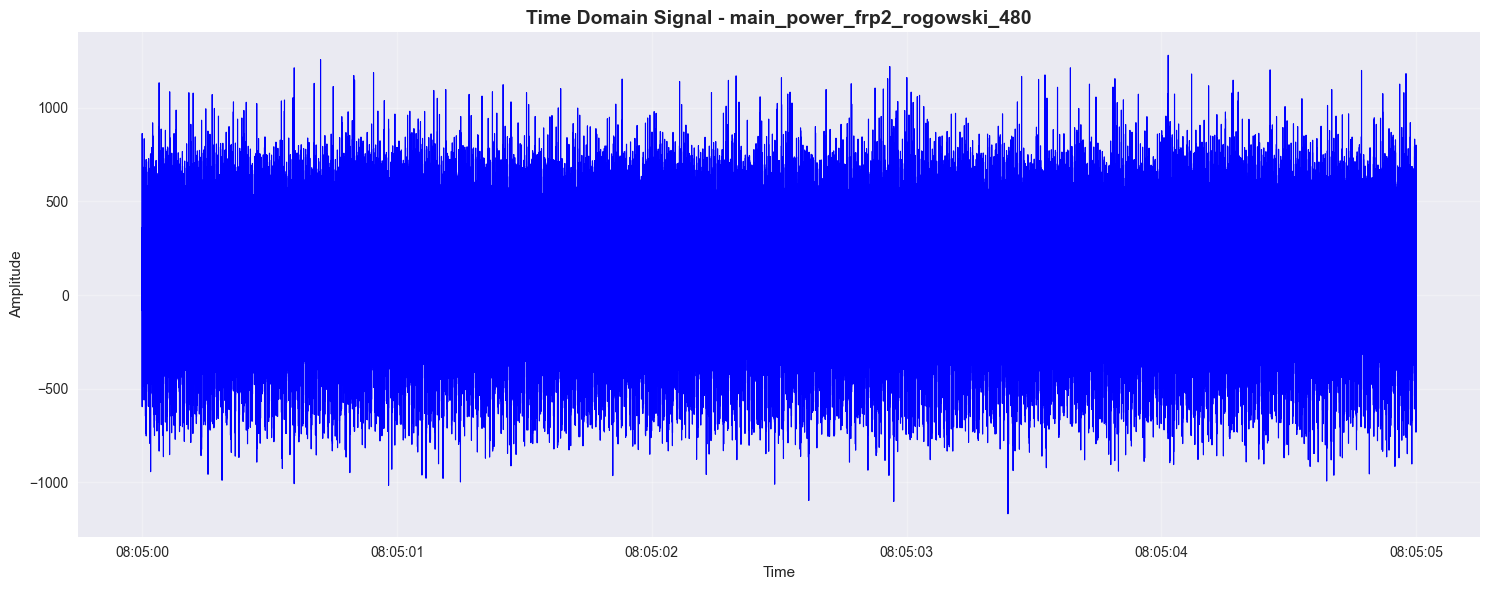

In [11]:
# Plot time domain signal with phase markers
analyzer.plot_time_domain_signal(example_dataset, max_duration=5)


### 2. FFT Magnitude Spectrum (Chart Type #3)


Using MHKiT dolfyn for FFT magnitude spectrum...
Calculating FFT using MHKiT dolfyn tools for main_power_frp2_rogowski_480...
  Signal length: 50,000,000 samples
  FFT size: 2048
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for main_power_frp2_rogowski_480...


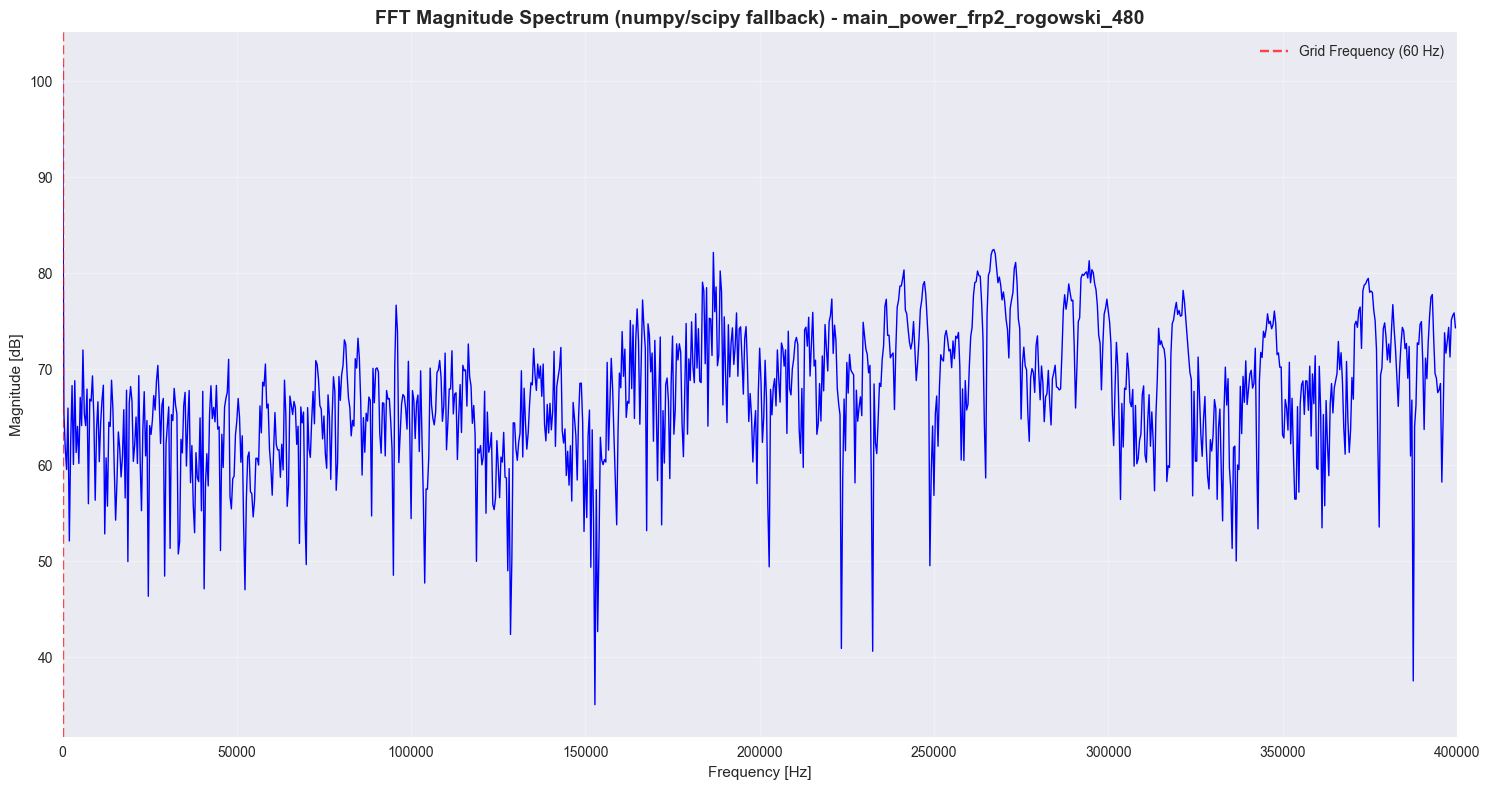

In [12]:
# Plot FFT Magnitude Spectrum
analyzer.plot_fft_magnitude_spectrum(example_dataset)


### 3. Power Spectral Density Plot (Chart Type #2)


Using MHKiT dolfyn for Power Spectral Density...
Calculating FFT using MHKiT dolfyn tools for main_power_frp2_rogowski_480...
  Signal length: 50,000,000 samples
  FFT size: 2048
  Sampling rate: 800000 Hz
Error in MHKiT dolfyn FFT calculation: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'
Falling back to standard FFT method...
Using fallback FFT calculation for main_power_frp2_rogowski_480...


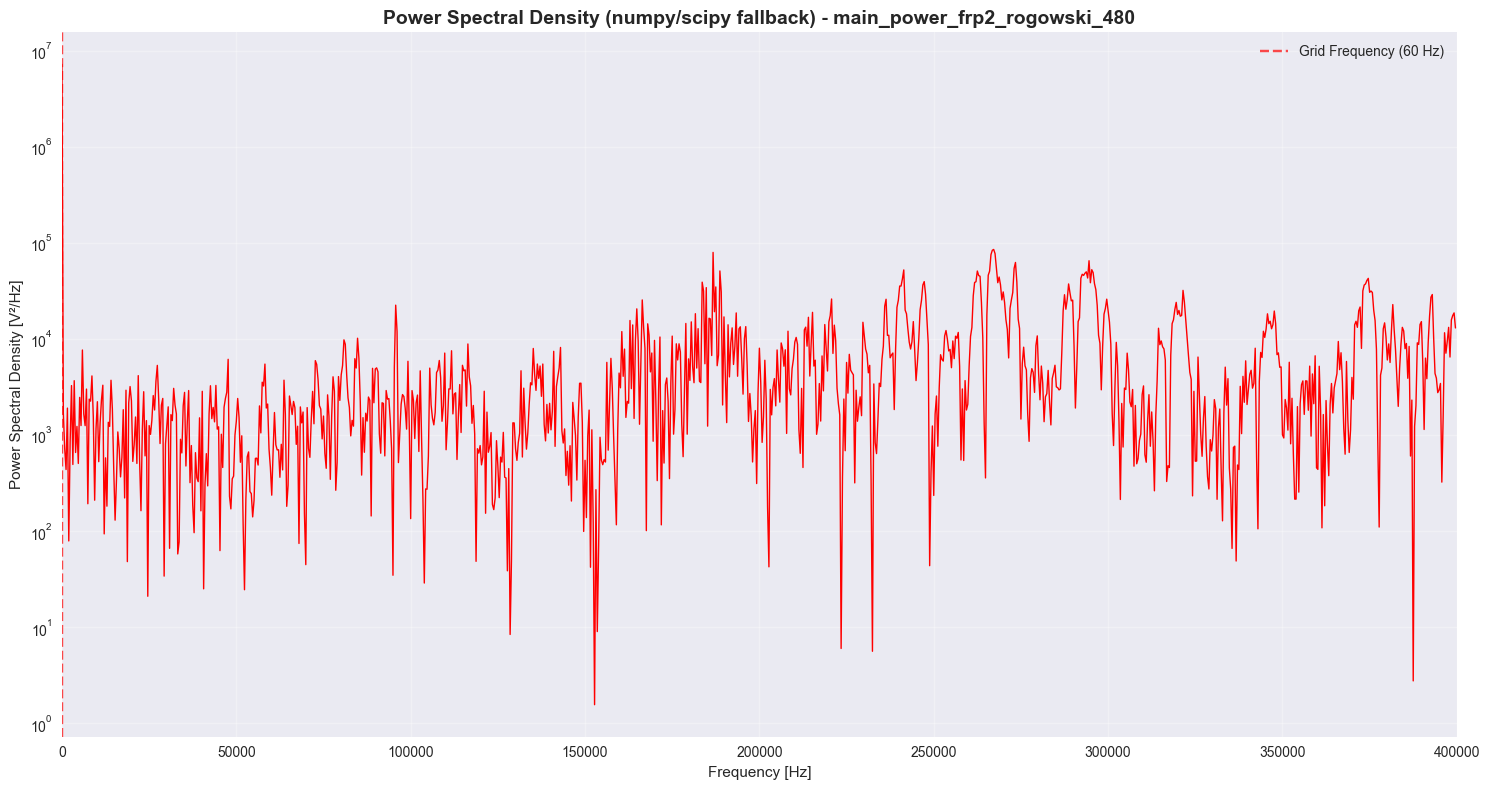

In [13]:
# Plot Power Spectral Density (PSD)
freqs, psd = analyzer.plot_power_spectral_density(example_dataset)


### 4. Spectrogram - Time-Frequency Heatmap (Chart Type #1)


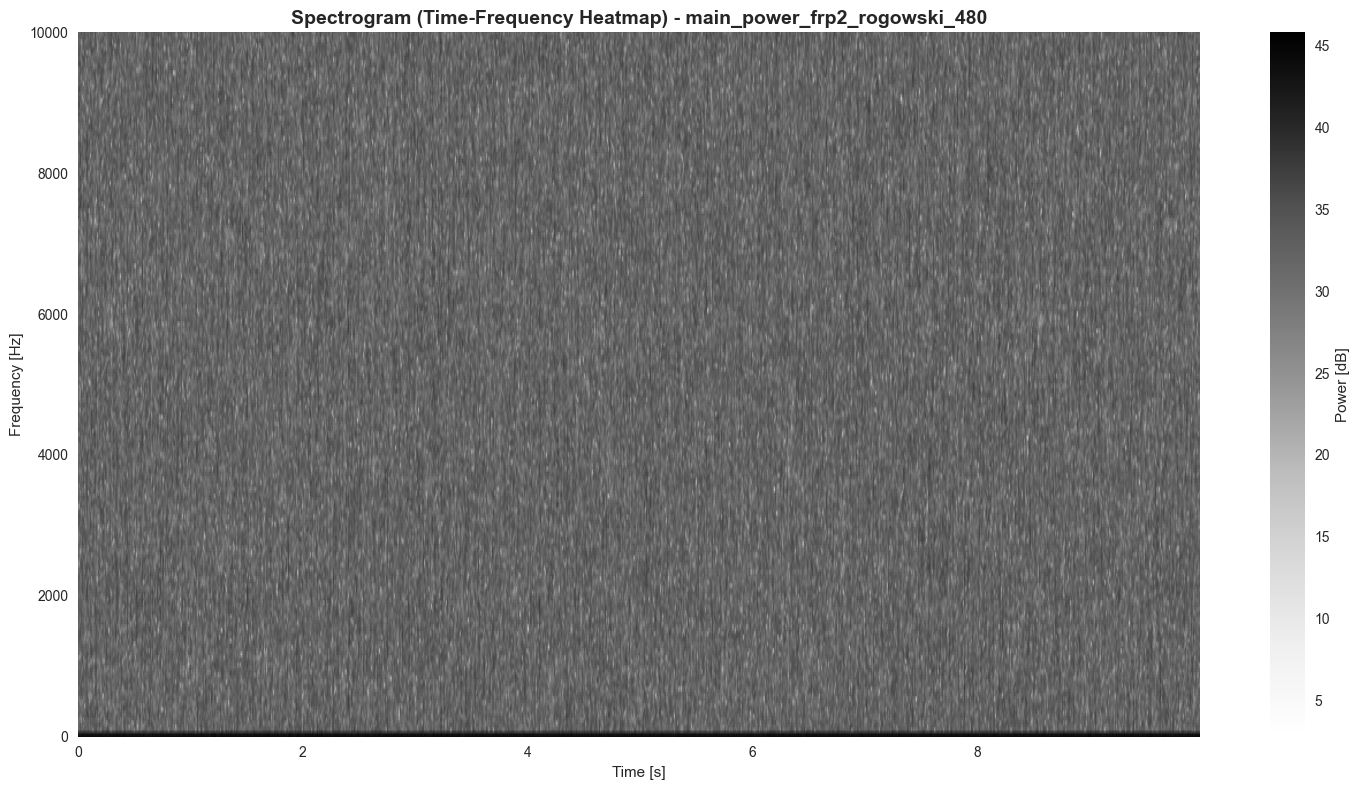

In [14]:
# Plot Spectrogram (Time-Frequency Heatmap)
f_spec, t_spec, Sxx = analyzer.plot_spectrogram(example_dataset, max_duration=10)


### 5. Harmonic Line Plot - Amplitude vs Harmonic Order (Chart Type #4)


In [15]:
# Plot Harmonic Line Plot
analyzer.plot_harmonic_line_plot(example_dataset)


No harmonic analysis results for 'main_power_frp2_rogowski_480'. Running analyze_harmonics_mhkit first...
Performing MHKiT harmonic analysis on main_power_frp2_rogowski_480 (freq=60)...
Failed to analyze harmonics for 'main_power_frp2_rogowski_480': grid_freq must be either 50 or 60. Got 800000


### 6. Phase-Amplitude Polar Plot (Chart Type #5)


In [16]:
# Plot Phase-Amplitude Polar Plot
#analyzer.plot_phase_amplitude_polar(example_dataset)


### 7. THCD Evolution Over Time


In [17]:
# Plot THCD over time
analyzer.plot_thcd_over_time(example_dataset)


No harmonic analysis results for 'main_power_frp2_rogowski_480'. Running analyze_harmonics_mhkit first...
Performing MHKiT harmonic analysis on main_power_frp2_rogowski_480 (freq=60)...
Failed to analyze harmonics for 'main_power_frp2_rogowski_480': grid_freq must be either 50 or 60. Got 800000


## Step 3: PhD-Level Advanced Visualizations


### 8. Continuous Wavelet Transform (CWT) Scalogram


PyWavelets not available. Using alternative time-frequency analysis...


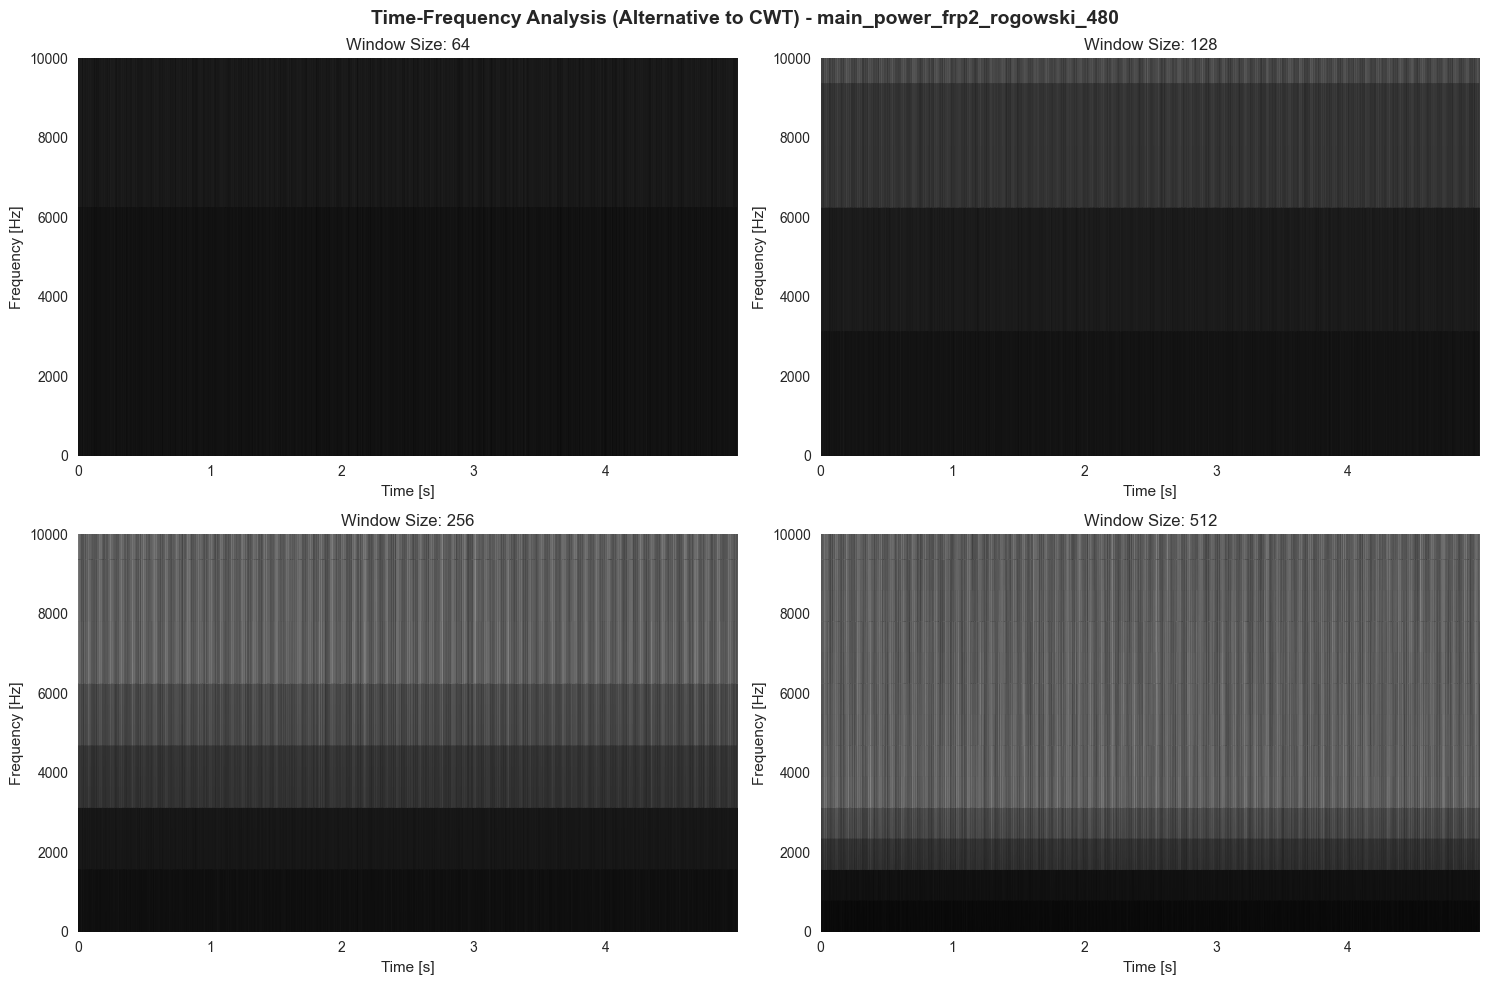

In [18]:
# Plot CWT Scalogram
analyzer.plot_cwt_scalogram(example_dataset, max_duration=5)


### 9. Cepstrum Plot (Power Cepstrum)


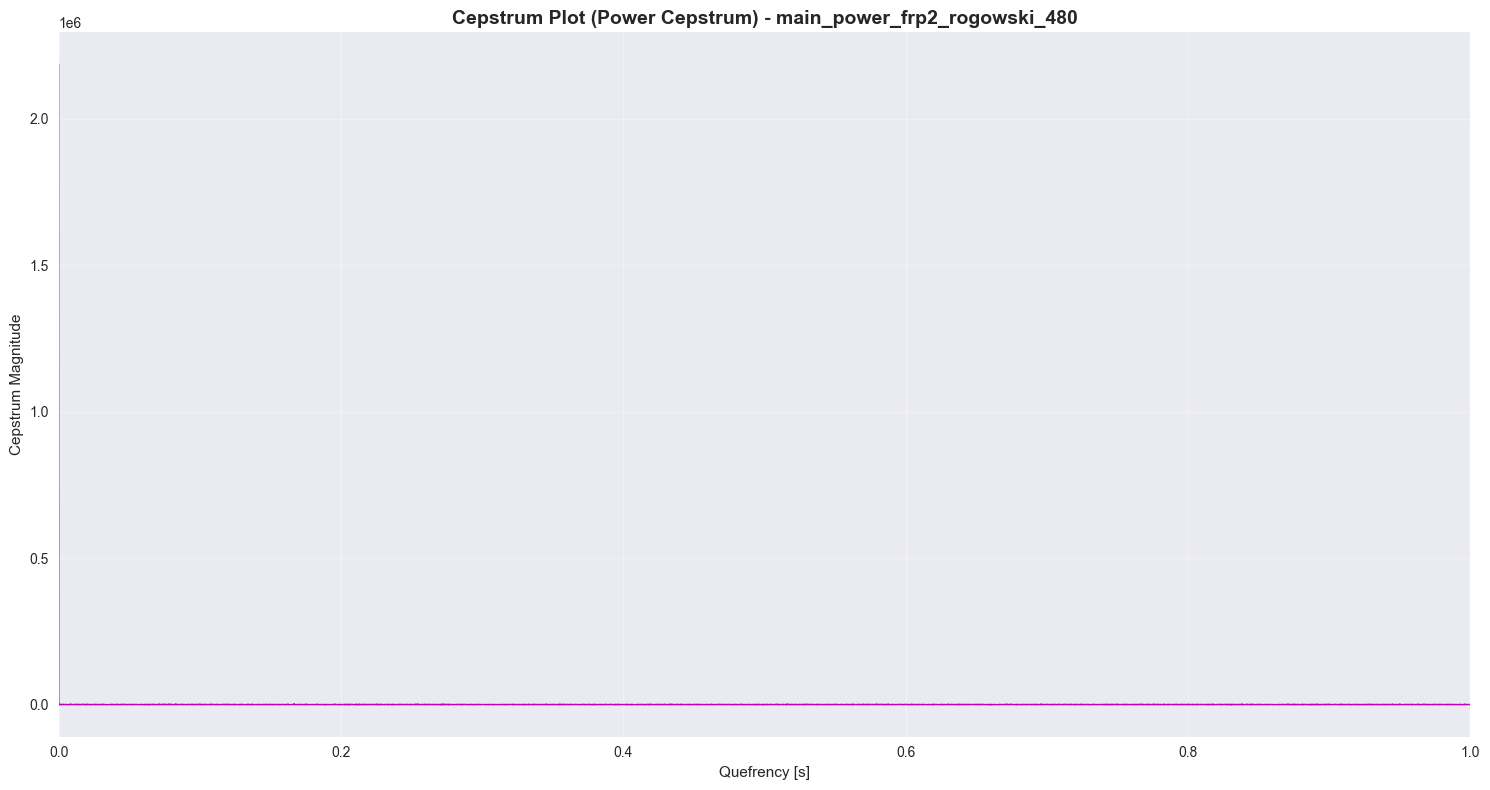

In [19]:
# Plot Cepstrum
analyzer.plot_cepstrum(example_dataset)


In [20]:
### 10. Wigner-Ville Distribution (WVD)


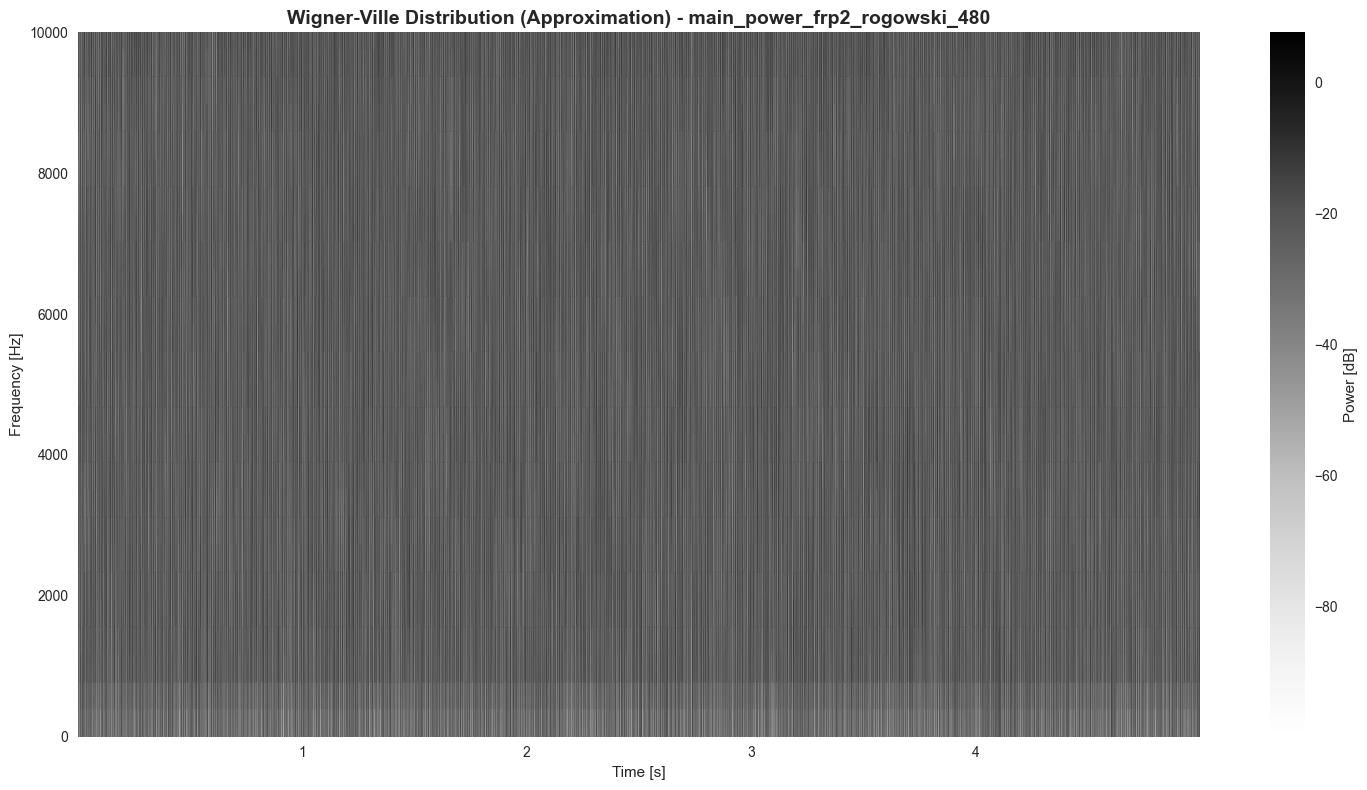

In [21]:
# Plot Wigner-Ville Distribution (WVD)
analyzer.plot_wigner_ville_distribution(example_dataset, max_duration=5)


In [22]:
### 11. Hilbert-Huang Transform (HHT)


HHT calculation failed: Dimensions of C (99, 49) are incompatible with X (50) and/or Y (100); see help(pcolormesh)
Using alternative analysis...


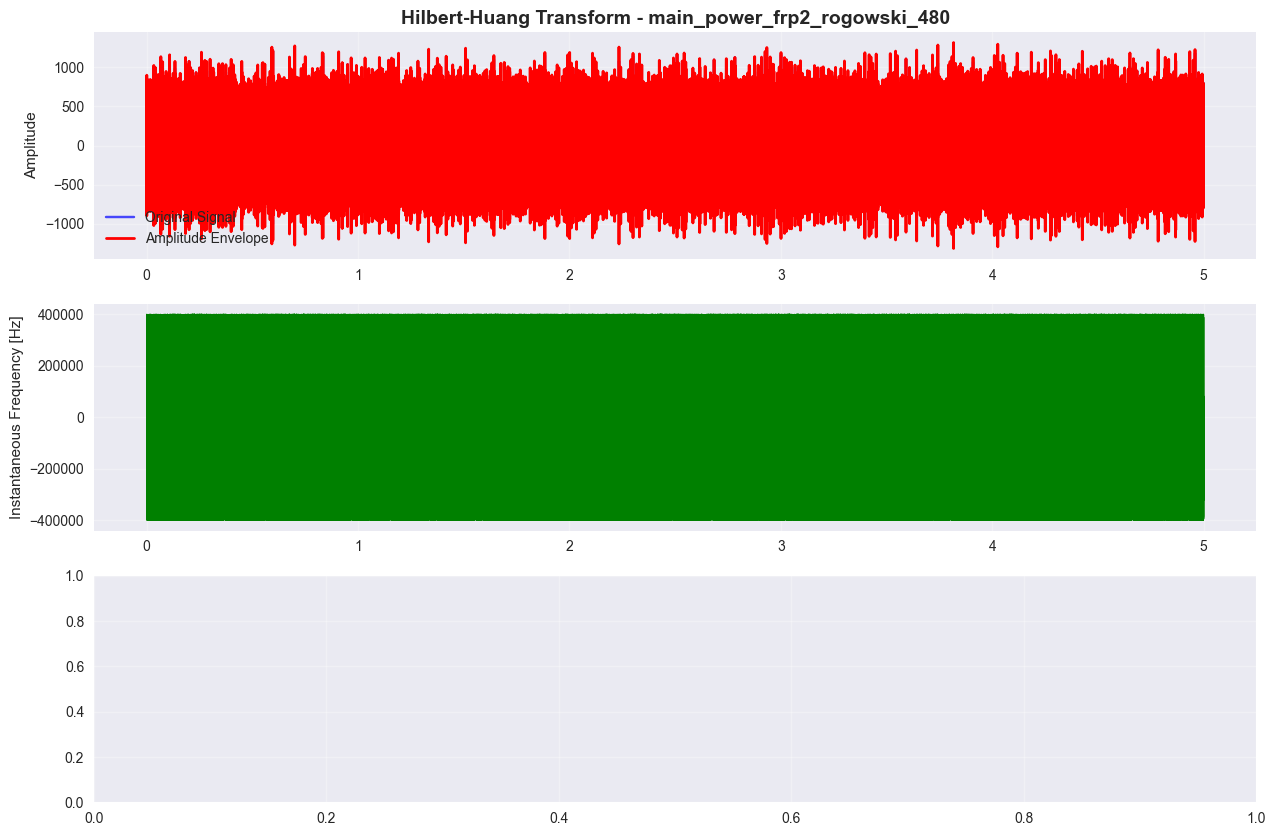

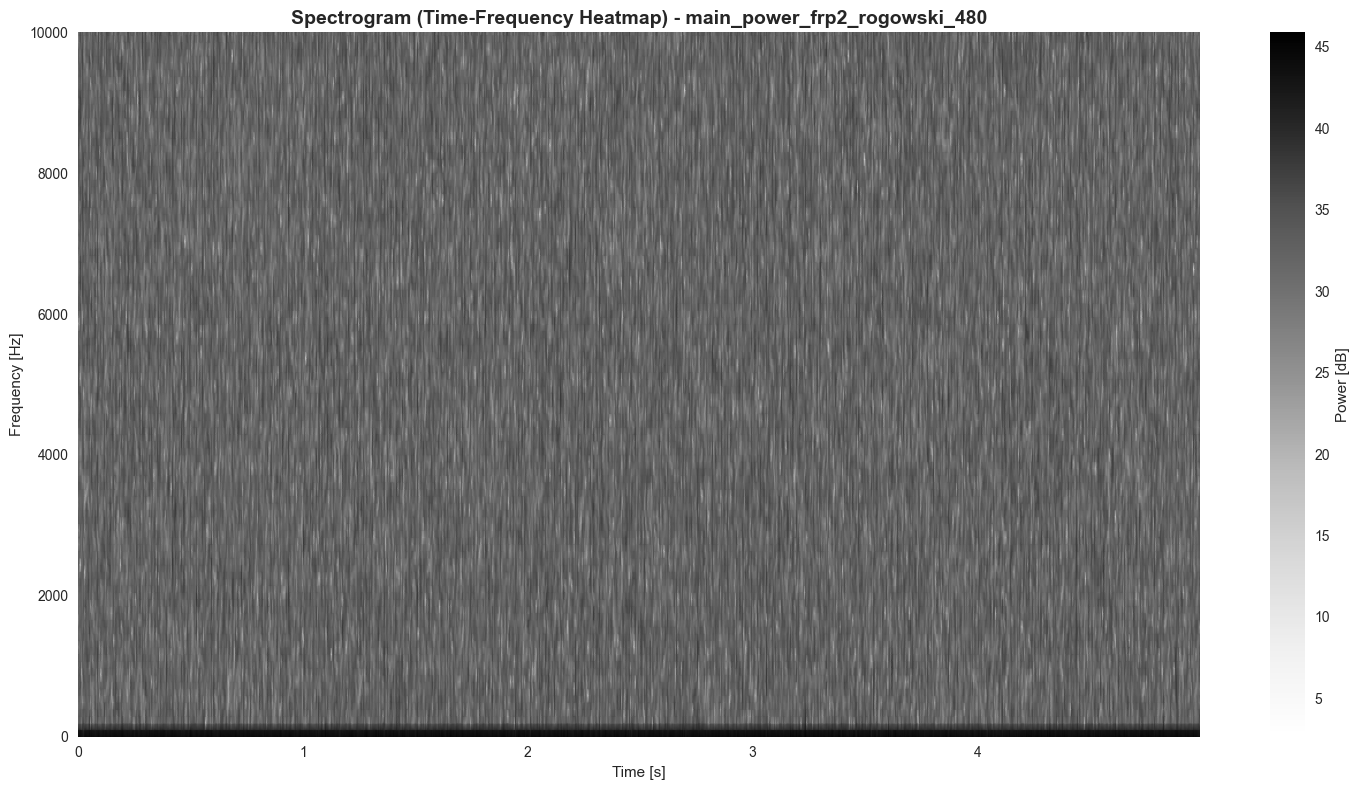

In [23]:
# Plot Hilbert-Huang Transform (HHT)
analyzer.plot_hilbert_huang_transform(example_dataset, max_duration=5)


In [24]:
### 12. Bispectrum Analysis


In [ ]:
# Plot Bispectrum
analyzer.plot_bispectrum(example_dataset, max_duration=5)


In [ ]:
### 13. Reassigned Spectrogram


In [ ]:
# Plot Reassigned Spectrogram
analyzer.plot_reassigned_spectrogram(example_dataset, max_duration=10)


## Step 4: Additional Metrics and Statistical Analysis


In [ ]:
# Calculate additional metrics for the example dataset
additional_metrics = analyzer.calculate_additional_metrics(example_dataset)

print("Additional Metrics for", example_dataset)
print("="*50)
for key, value in additional_metrics.items():
    if isinstance(value, (int, float)):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {type(value).__name__} with shape {getattr(value, 'shape', 'N/A')}")


## Step 5: Generate Comprehensive Reports for All Datasets


In [ ]:
# Generate comprehensive reports for all datasets
for dataset_name in datasets_to_analyze:
    if dataset_name in analyzer.analysis_results:
        print(f"\n{'='*80}")
        analyzer.generate_comprehensive_report(dataset_name)
        print(f"{'='*80}")


## Step 6: Export Results to Files


In [ ]:
# Export analysis results to CSV files
output_dir = "analysis_results"
os.makedirs(output_dir, exist_ok=True)

for dataset_name in datasets_to_analyze:
    if dataset_name in analyzer.analysis_results:
        results = analyzer.analysis_results[dataset_name]
        
        # Export harmonics data
        harmonics_file = os.path.join(output_dir, f"{dataset_name}_harmonics.csv")
        results['harmonics'].to_csv(harmonics_file)
        
        # Export harmonic subgroups
        subgroups_file = os.path.join(output_dir, f"{dataset_name}_harmonic_subgroups.csv")
        results['harmonic_subgroups'].to_csv(subgroups_file)
        
        # Export THCD data
        thcd_file = os.path.join(output_dir, f"{dataset_name}_thcd.csv")
        results['thcd'].to_csv(thcd_file)
        
        # Export interharmonics data
        interharmonics_file = os.path.join(output_dir, f"{dataset_name}_interharmonics.csv")
        results['interharmonics'].to_csv(interharmonics_file)
        
        print(f"Exported results for {dataset_name} to {output_dir}/")


## Step 7: Summary and Conclusions


In [ ]:
# Final summary
print("\n" + "="*80)
print("COMPREHENSIVE HARMONIC ANALYSIS SUMMARY")
print("="*80)

print(f"\nAnalysis completed for {len(datasets_to_analyze)} datasets:")
for i, dataset in enumerate(datasets_to_analyze, 1):
    print(f"  {i}. {dataset}")

print("\nGenerated visualizations:")
print("  ✓ Time-domain signal plots")
print("  ✓ FFT Magnitude Spectrum")
print("  ✓ Power Spectral Density (PSD)")
print("  ✓ Spectrogram (Time-Frequency Heatmap)")
print("  ✓ Harmonic Line Plot")
print("  ✓ Phase-Amplitude Polar Plot")
print("  ✓ THCD Evolution Over Time")
print("  ✓ CWT Scalogram (PhD-level)")
print("  ✓ Cepstrum Plot (PhD-level)")

print("\nGenerated metrics:")
print("  ✓ MHKiT harmonic analysis (IEC 61000-4-7 compliant)")
print("  ✓ Harmonic subgroups")
print("  ✓ Total Harmonic Current Distortion (THCD)")
print("  ✓ Interharmonics analysis")
print("  ✓ RMS, Peak, Crest Factor")
print("  ✓ Power Quality Assessment")
print("  ✓ Standards Compliance Check")

print("\nResults exported to:")
print(f"  {output_dir}/ directory")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
